# Importing Libraries

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
print(__doc__)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# EDA

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Label encoding

In [8]:
dict ={
    'M':0,
    'F':1
}
df['GENDER']= df['GENDER'].map(dict)

In [9]:
dict ={
    'YES':1,
    'NO':0
}
df['LUNG_CANCER']= df['LUNG_CANCER'].map(dict)

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SMOKING', ylabel='count'>

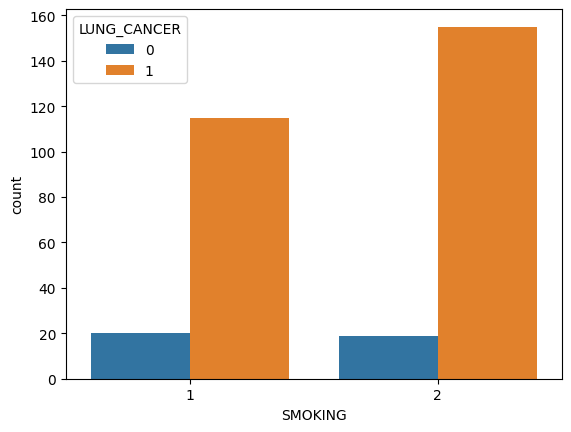

In [11]:
sns.countplot(df['SMOKING'],hue=df['LUNG_CANCER'])

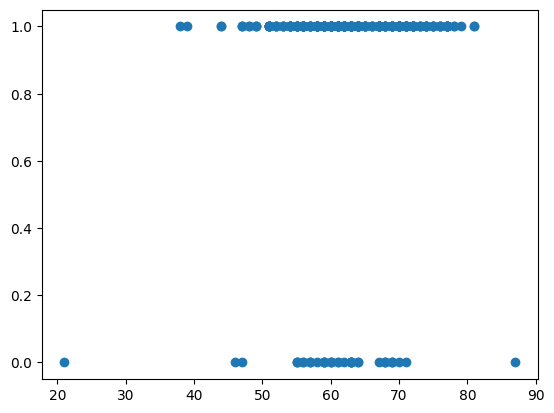

In [12]:
plt.scatter(df['AGE'],df['LUNG_CANCER'])

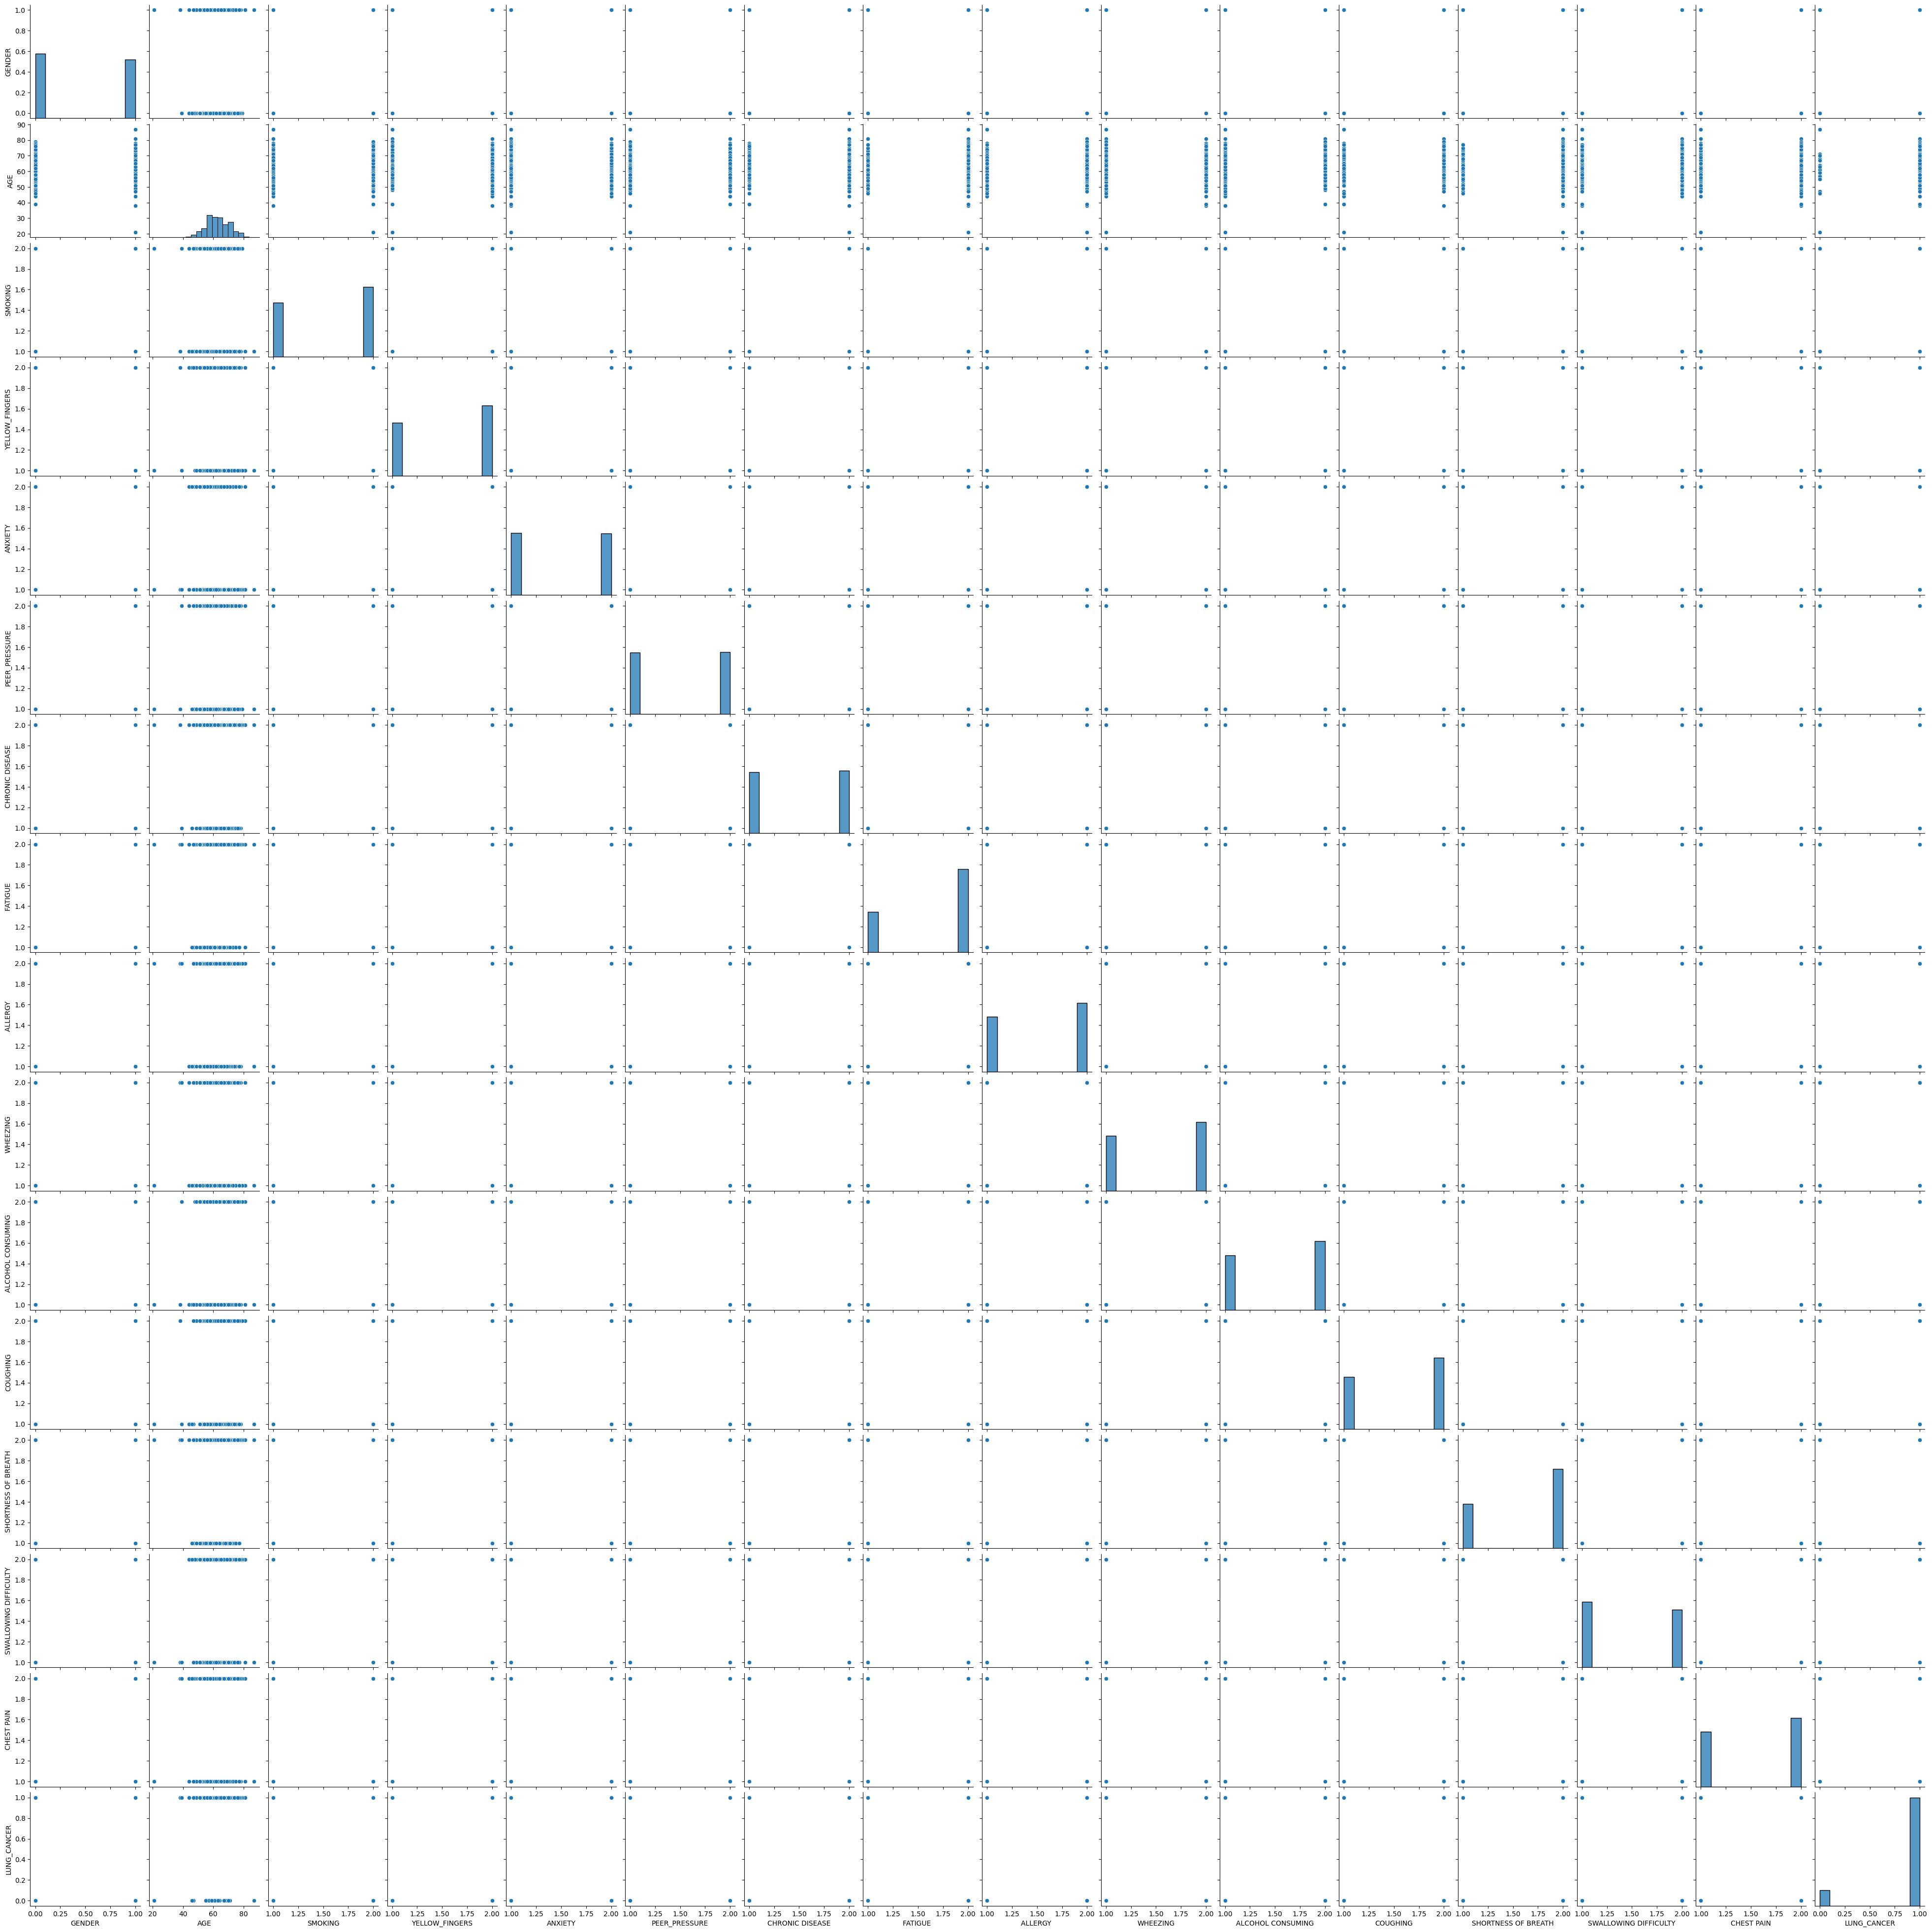

In [13]:
sns.pairplot(df)

# Spliting data

In [14]:
x = df.drop(['LUNG_CANCER'],axis=1)
y = df['LUNG_CANCER']

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape

(247, 15)

In [17]:
y_train.shape

(247,)

# applying Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred , y_test))

0.967741935483871


[Text(0.7521802325581395, 0.95, 'X[8] <= 1.5\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(0.5973837209302325, 0.85, 'X[13] <= 1.5\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(0.3808139534883721, 0.75, 'X[11] <= 1.5\ngini = 0.495\nsamples = 62\nvalue = [28, 34]'),
 Text(0.19186046511627908, 0.65, 'X[6] <= 1.5\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.09302325581395349, 0.55, 'X[1] <= 56.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.046511627906976744, 0.45, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023255813953488372, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06976744186046512, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13953488372093023, 0.45, 'X[4] <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.11627906976744186, 0.35, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.16279069767441862, 0.35, 'X[5] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.13953488

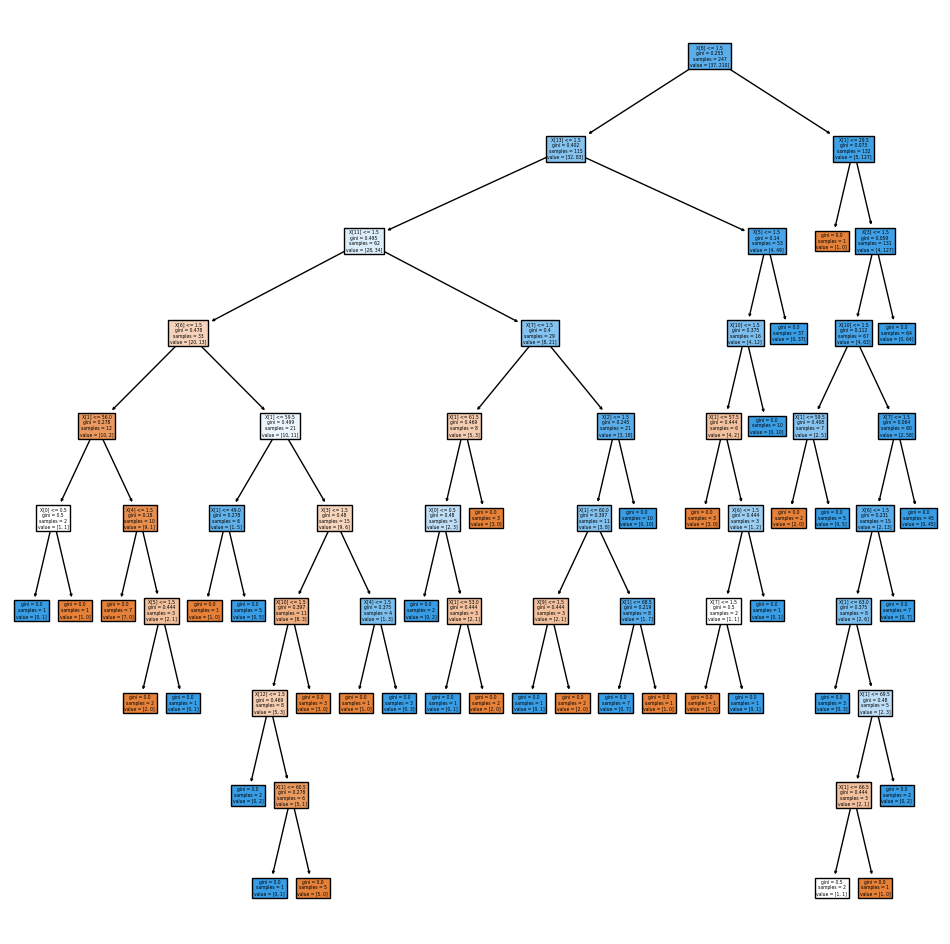

In [20]:
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dtree,filled=True)

**It is Overfitting**

**below function returns all posible paths for which the cc_alpha or cost parameter are decided along with it and the impurities or total amount of error in tree**

In [48]:
path = dtree.cost_complexity_pruning_path(x_train , y_train)
cc_alphas , impurities = path.ccp_alphas , path.impurities

In [49]:
cc_alphas

array([0.        , 0.00134953, 0.0025641 , 0.00269906, 0.00337382,
       0.0048583 , 0.00520532, 0.00524839, 0.00539811, 0.00546559,
       0.00582996, 0.00663196, 0.00755258, 0.00788685, 0.00957401,
       0.01090425, 0.0136271 , 0.03074466])

In [50]:
impurities

array([0.00404858, 0.00539811, 0.01565452, 0.02105263, 0.03454791,
       0.04426451, 0.06508579, 0.08083097, 0.08622908, 0.09169467,
       0.12084446, 0.13410839, 0.14166097, 0.14954782, 0.16869584,
       0.17960009, 0.19322719, 0.25471652])

In [51]:
clfs = []
for cc_alpha in cc_alphas:
    dtree = DecisionTreeClassifier(random_state=0,ccp_alpha = cc_alpha)
    dtree.fit(x_train , y_train)
    clfs.append(dtree)
print("Number of nodess in the last tree is : {} with ccp_alpha : {}".format(clfs[-1].tree_.node_count , cc_alphas[-1]))

Number of nodess in the last tree is : 1 with ccp_alpha : 0.030744663565635072


# Accuracy vs alpha for training and testing sets

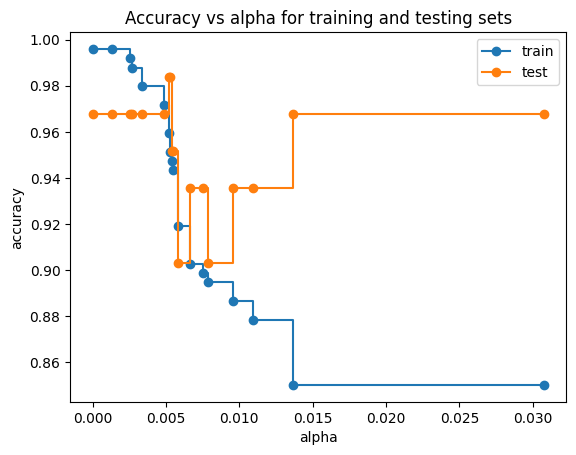

In [54]:
train_scores = [dtree.score(x_train , y_train ) for dtree in clfs]
test_scores = [dtree.score(x_test , y_test ) for dtree in clfs]

fig , ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(cc_alphas ,train_scores , marker = 'o',label='train',drawstyle = 'steps-post')
ax.plot(cc_alphas ,test_scores , marker = 'o',label='test',drawstyle = 'steps-post')
ax.legend()
plt.show()

**cc_alpha value should be in between 0.011 to 0.114 and it will create a generlized model**

In [63]:
dtree = DecisionTreeClassifier(random_state=0,ccp_alpha=0.012)
dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred , y_test))

0.9354838709677419


[Text(0.6666666666666666, 0.875, 'X[8] <= 1.5\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(0.5, 0.625, 'X[13] <= 1.5\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(0.3333333333333333, 0.375, 'X[11] <= 1.5\ngini = 0.495\nsamples = 62\nvalue = [28, 34]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.5, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.14\nsamples = 53\nvalue = [4, 49]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.073\nsamples = 132\nvalue = [5, 127]')]

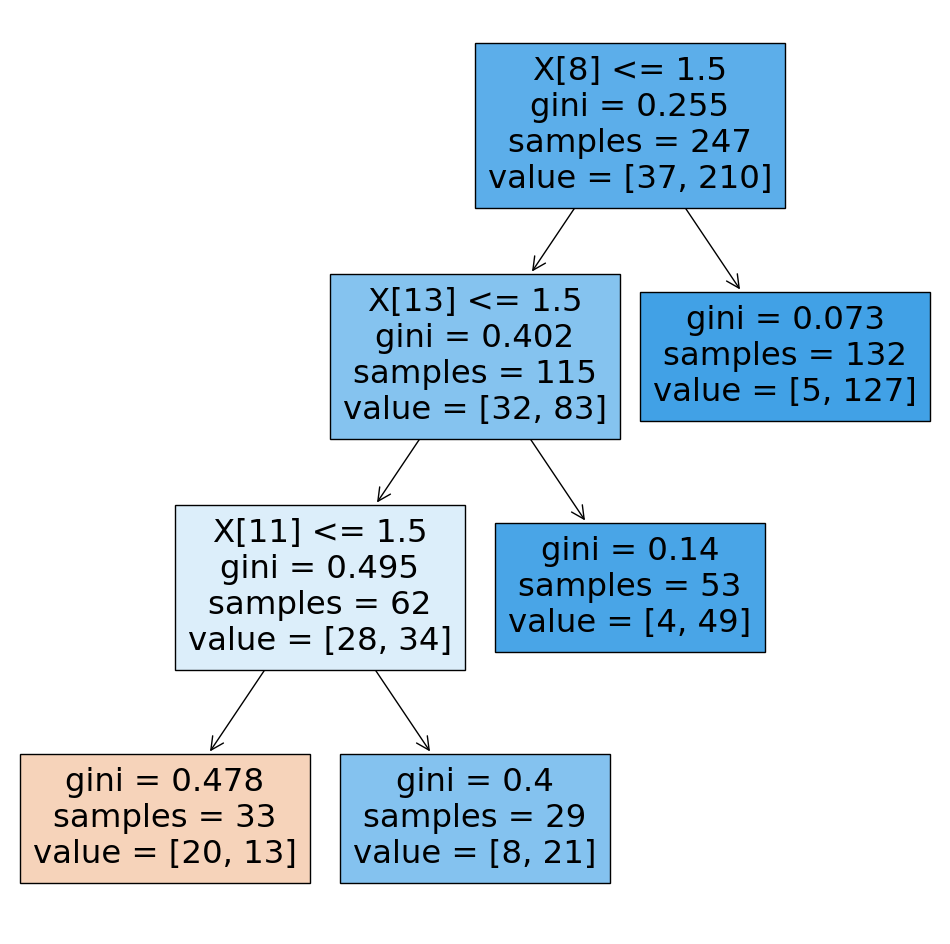

In [64]:
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dtree,filled=True)

**now this is generlized model and there is no overfitting in it modell**